In [49]:
import cv2
import cv
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In order to apply SLIC on image first we need to initilize uniform centers.After having k uniform centers it by checking gradient of each center in a 13*13 region we move them to picels that are not edges in image.Two functions below are for designed to initialize final centers for input k and returns list of vectors (each vector represent a center by [x,y,l,a,b]).From now we will refer to each center by its index in the array given by these functions.

In [50]:
def init_centers(k,img):
    h=img.shape[0]
    w=img.shape[1]
    
    k=np.log2(k)
    h_k=2**int(k/2)
    w_k=2**(k-int(k/2))

    x_dist=int(h/(h_k+1))
    y_dist=int(w/(w_k+1))
    centers=[]
    
    for x in range(x_dist,h-x_dist+1,x_dist):
        for y in range(y_dist,w-y_dist+1,y_dist):
            l=img[x,y,0]
            a=img[x,y,1]
            b=img[x,y,2]
            centers.append(np.array([x,y,l,a,b]))
    
    return centers 

In [51]:
def gradient_check(vector):
    h=image.shape[0]
    w=image.shape[1]
    
    x=vector[0]
    y=vector[1]
    
    g = image[x + 1][y + 1][0]-image[x][y][0] + image[x + 1][y + 1][1]-image[x][y][1] +image[x + 1][y+ 1][2]-image[x][y][2]
    x_res=x
    y_res=y
    
    for i in range(-6,6):
        x1=x+i
        y1=y+i
        gradient = image[x1 + 1][y1 + 1][0]-image[x1][y1][0] +image[x1 + 1][y1 + 1][1]-image[x1][y1][1] +image[x1 + 1][y1 + 1][2]-image[x1][y1][2]
        if gradient<g:
            g=gradient
            x_res=x1
            y_res=y1
            
    return [x_res,y_res,image[x_res,y_res,0],image[x_res,y_res,1],image[x_res,y_res,2]]

Now for each center we should check a S.S resion and by calculating related D we can map pixels to centers(labels).
The function "compute_d" get two vectors which represent pixels in form [x,y,l,a,b] and compute their d with global variable alfa that we set value for each k differently.
The function "cluster" gets an index which maps us to a center and by checking pixels in a S*S region around that center map pixels to a center by saving related index in array "labels".Whenever a pixel is already mapped to a center we will check two calculated d and map that pixel to the center it is most similar to(which means the related d is less).

In order to lessen time of program i used np.vectorize to apply "cluster" on all centers.After applying "cluster function on all centers I use edge detection on "labels" to seperate each region and display it.

In [52]:
def compute_d(vector,center):
    d_lab=math.sqrt((vector[2]-center[2])**2 + (vector[3]-center[3])**2 + (vector[4]-center[4])**2)
    d_xy=math.sqrt((vector[0]-center[0])**2 + (vector[1]-center[1])**2)
        
    return d_lab+(alfa * d_xy)

In [53]:
def cluster(index):
    center=centers[index][0]
    
    x=center[0]; y=center[1];
    l=center[2];  a=center[3];  b=center[4]
    
    h=image.shape[0]
    w=image.shape[1]
    
    max_d=float('inf')
    
    for i in range(0,S):
        for j in range(0,S):
            x1=int(x+i); y1=int(y+j)
            if (x1>=0) & (x1<h) & (y1>=0) & (y1<w):
                v=[x1,y1,image[x1,y1,0],image[x1,y1,1],image[x1,y1,2]]
                d=compute_d(v,center)
                if label[x1][y1]==0:
                    label[x1][y1]=int(index+1)
                elif d<max_d:
                    c2=centers[int(label[x1][y1]-1)][0]       
                    d2=compute_d(v,c2)
                    if d2>d:
                        label[x1][y1]=index+1 
            x1=int(x-i); y1=int(y-j)
            if (x1>=0) & (x1<h) & (y1>=0) & (y1<w):
                v=[x1,y1,image[x1,y1,0],image[x1,y1,1],image[x1,y1,2]]
                d=compute_d(v,center)
                if label[x1][y1]==0:
                    label[x1][y1]=int(index+1)
                elif d<max_d:
                    c2=centers[int(label[x1][y1]-1)][0]  
                    d2=compute_d(v,c2)
                    if d2>d:
                        label[x1][y1]=index+1 

In [54]:
vfunc=np.vectorize(cluster)

Below are some global variables that are used in functions.

In [66]:
centers=[]
global centers
global S
global k
global label
global image
global alfa

From here we set a special k and apply functions on image.

In [67]:
#set k here:

# k=64; alfa=0.1; med=11
# k=256; alfa=0.1; med=11
# k=1024; alfa=0.3; med=11
k=2048; alfa=0.1; med=9

In [68]:
slic=cv2.imread('slic.jpg')
slic=cv2.cvtColor(slic,cv2.COLOR_BGR2LAB)

#resizing image
width = int(slic.shape[1] * 1 / 6)
height = int(slic.shape[0] * 1 / 6)
dim = (width, height)
image = cv2.resize(slic, dim, interpolation = cv2.INTER_AREA)

In [69]:
label=np.zeros([image.shape[0],image.shape[1]])#matrix motenazer image

In [70]:
#init k centers:
c=init_centers(k,image)
for i in range(0,k):
    v=gradient_check(c[i][:])
    centers.append([v])

/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


In [71]:
#init S:
k1=np.log2(k)
h_k=image.shape[0]/(2**int(k1/2))
w_k=image.shape[1]/(2**(k1-int(k1/2)))
S=int(max(h_k,w_k))

In [72]:
#applying cluster(vectorized):
arr=[]
for i in range(0,k):
    arr.append(i)

array=np.array(arr).astype(int)
vfunc(array)
print("-executed-")

/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


-executed-


In order to reduce noise i applied "medianBlur" function on result.

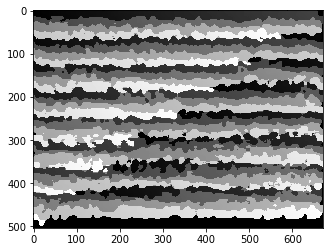

In [73]:
#plotting color matrix:
l=np.uint8(label)

median = cv2.medianBlur(l,med)

plt.imshow(median,cmap='gray')

In [74]:
edges = cv2.Canny(median,0,0.1)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [75]:
image=cv2.cvtColor(image,cv2.COLOR_LAB2BGR)
cv2.drawContours(image, contours, -1, (0, 0, 0), 1) 
cv2.imwrite('res08.jpg',image)

True

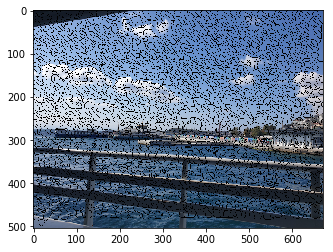

In [76]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)